In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [6]:
#check if there is Null values in data or not
df.isnull().sum().sum()

np.int64(0)

In [7]:
#check if there is duplicate values in data or not
df.duplicated().sum()

np.int64(3854)

In [8]:
#Removing the duplicated values
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

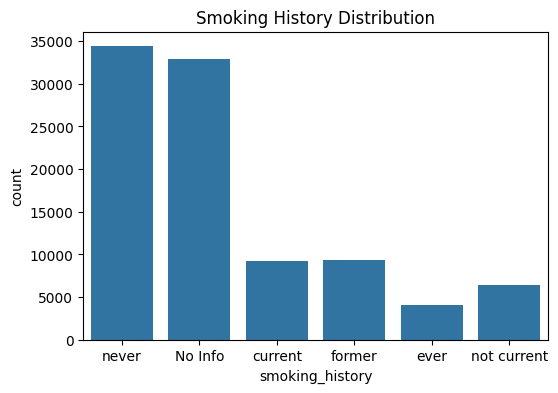

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="smoking_history", data=df)
plt.title("Smoking History Distribution")
plt.show()

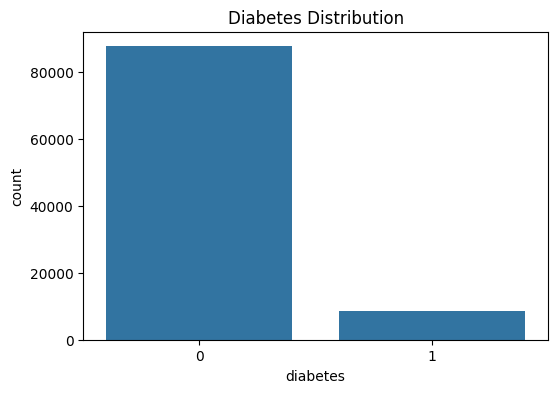

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="diabetes", data=df)
plt.title("Diabetes Distribution")
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

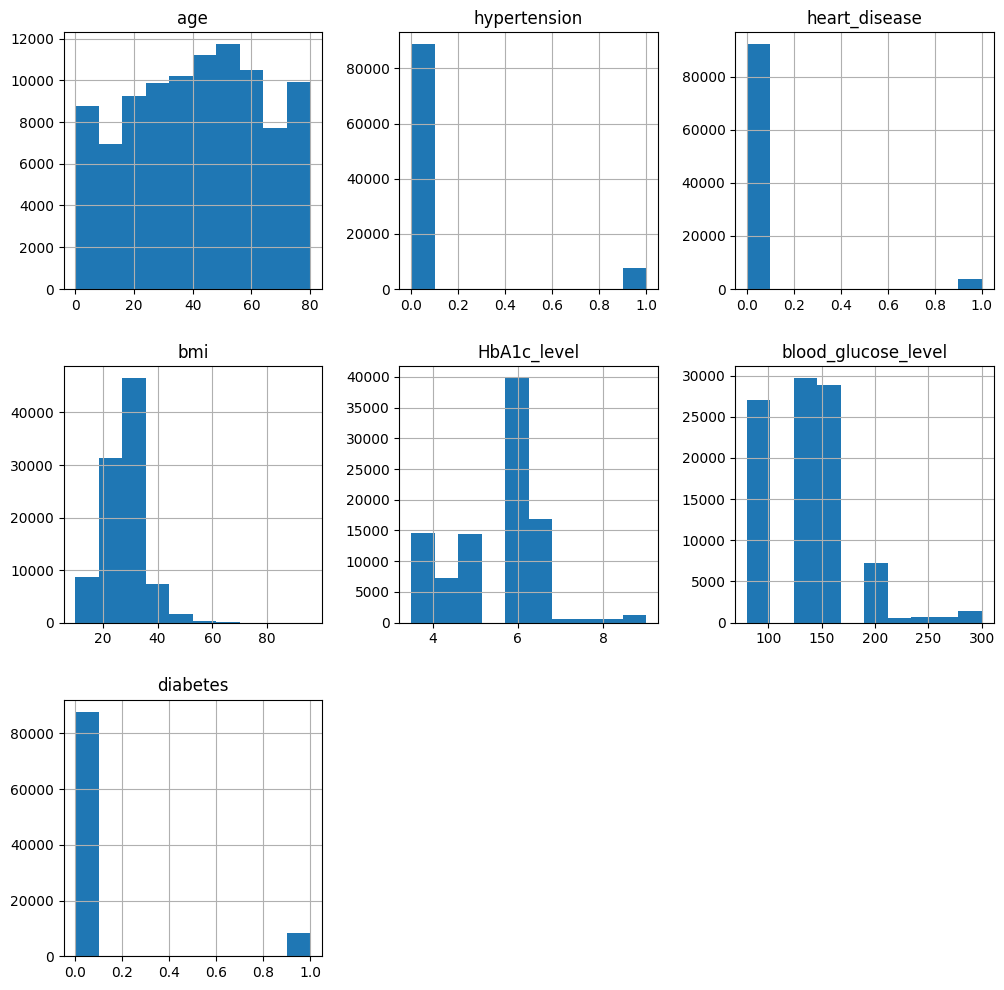

In [12]:
df.hist(figsize=(12,12))

In [13]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [14]:
df["gender"]=df["gender"].str.replace("Other","Male")

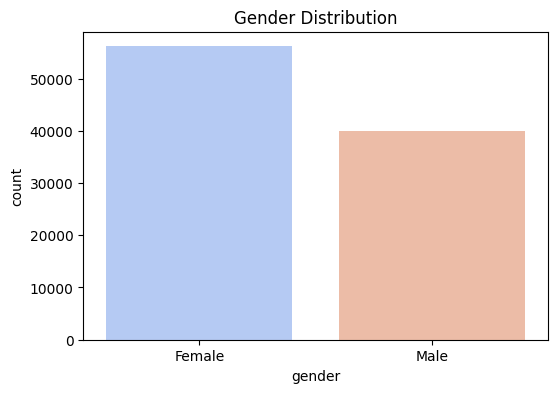

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()

In [16]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
# One-hot encode the 'smoking_history' column
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)
df.head(15)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False
5,0,20.0,0,0,27.32,6.6,85,0,False,False,False,True,False
6,0,44.0,0,0,19.31,6.5,200,1,False,False,False,True,False
7,0,79.0,0,0,23.86,5.7,85,0,False,False,False,False,False
8,1,42.0,0,0,33.64,4.8,145,0,False,False,False,True,False
9,0,32.0,0,0,27.32,5.0,100,0,False,False,False,True,False


In [17]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.head(15)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0
5,0,20.0,0,0,27.32,6.6,85,0,0,0,0,1,0
6,0,44.0,0,0,19.31,6.5,200,1,0,0,0,1,0
7,0,79.0,0,0,23.86,5.7,85,0,0,0,0,0,0
8,1,42.0,0,0,33.64,4.8,145,0,0,0,0,1,0
9,0,32.0,0,0,27.32,5.0,100,0,0,0,0,1,0


In [18]:
numerical_cols = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

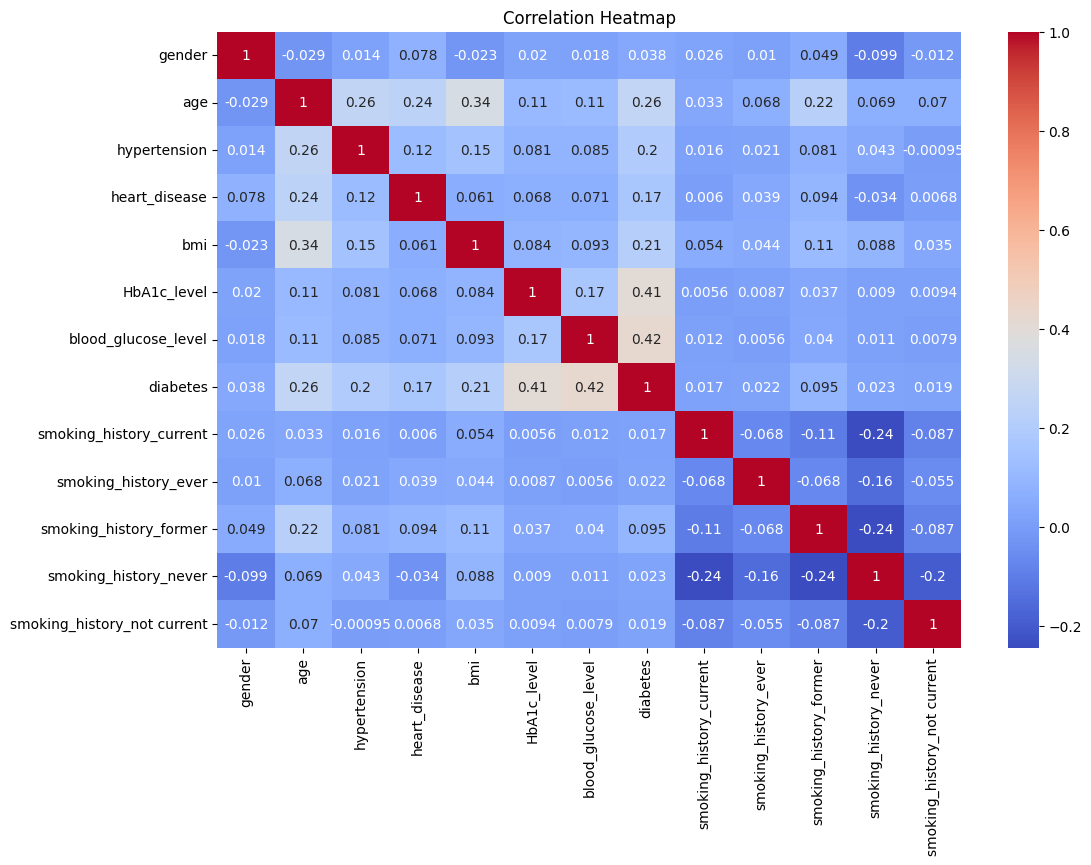

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [20]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=22)

In [21]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

95.86583463338533



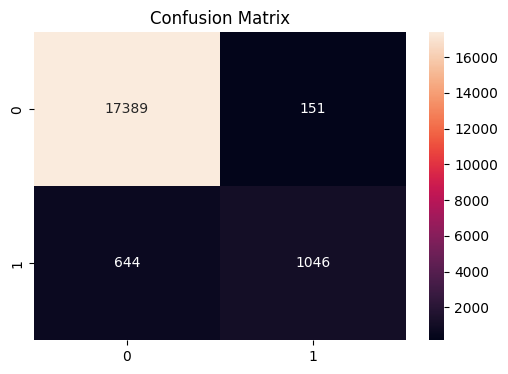


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17540
           1       0.87      0.62      0.72      1690

    accuracy                           0.96     19230
   macro avg       0.92      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230



In [22]:
y_pred = lr_model.predict(X_test)
print( accuracy_score(y_test,y_pred)*100)
print()
conf = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()
print()
print(classification_report(y_test,y_pred))

In [23]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

96.77067082683307



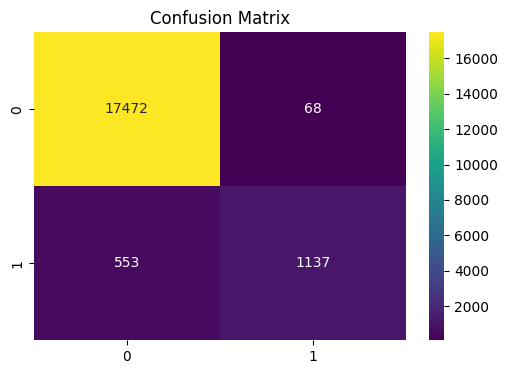


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17540
           1       0.94      0.67      0.79      1690

    accuracy                           0.97     19230
   macro avg       0.96      0.83      0.88     19230
weighted avg       0.97      0.97      0.97     19230



In [24]:
y_pred = rf_model.predict(X_test)
print( accuracy_score(y_test,y_pred)*100)
print()
conf = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf,annot=True,fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.show()
print()
print(classification_report(y_test,y_pred))

In [25]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

96.00624024960999



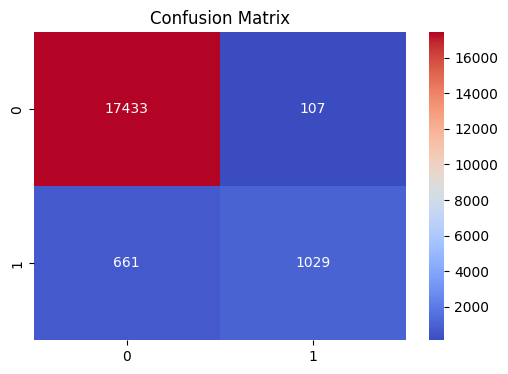


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17540
           1       0.91      0.61      0.73      1690

    accuracy                           0.96     19230
   macro avg       0.93      0.80      0.85     19230
weighted avg       0.96      0.96      0.96     19230



In [26]:
y_pred = knn_model.predict(X_test)
print( accuracy_score(y_test,y_pred)*100)
print()
conf = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf,annot=True,fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()
print()
print(classification_report(y_test,y_pred))

In [27]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

94.91939677587104



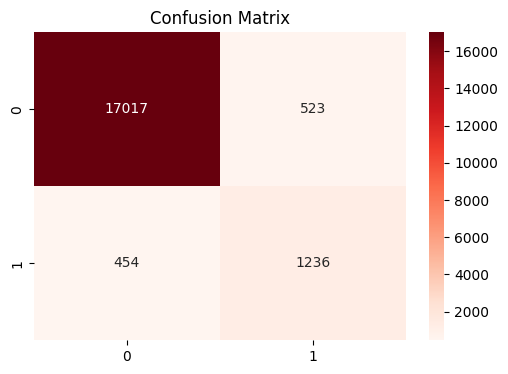


              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17540
           1       0.70      0.73      0.72      1690

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.84     19230
weighted avg       0.95      0.95      0.95     19230



In [28]:
y_pred = dt_model.predict(X_test)
print( accuracy_score(y_test,y_pred)*100)
print()
conf = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf,annot=True,fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.show()
print()
print(classification_report(y_test,y_pred))

<Figure size 1200x600 with 0 Axes>

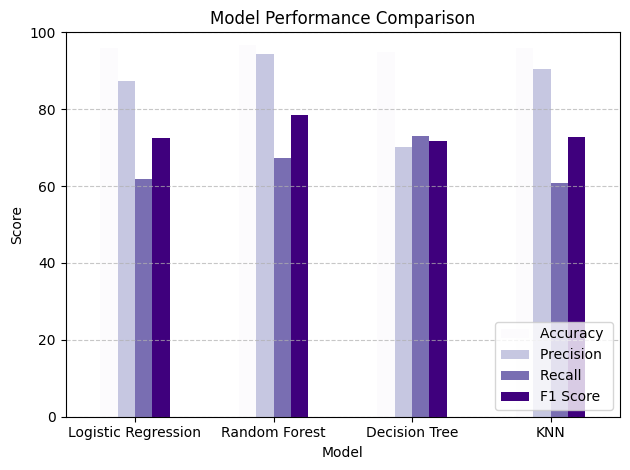

In [29]:
def evaluate_and_plot_models(X_test, y_test, lr_model, rf_model, dt_model, knn_model):
    models = {
        'Logistic Regression': lr_model,
        'Random Forest': rf_model,
        'Decision Tree': dt_model,
        'KNN': knn_model
    }

    metrics = {'Model': [], 'Accuracy ': [], 'Precision ': [], 'Recall ': [], 'F1 Score ': []}

    for name, model in models.items():
        y_pred = model.predict(X_test)
        metrics['Model'].append(name)
        metrics['Accuracy '].append(accuracy_score(y_test, y_pred) * 100)
        metrics['Precision '].append(precision_score(y_test, y_pred, zero_division=0) * 100)
        metrics['Recall '].append(recall_score(y_test, y_pred, zero_division=0) * 100)
        metrics['F1 Score '].append(f1_score(y_test, y_pred, zero_division=0) * 100)

    results_df = pd.DataFrame(metrics)
    results_df.set_index('Model', inplace=True)

    # Plot with percentage y-axis
    plt.figure(figsize=(12, 6))
    results_df.plot(kind='bar', colormap='Purples')
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.legend(loc='lower right')
    plt.show()

    return results_df

#Example:
df_results = evaluate_and_plot_models(X_test, y_test, lr_model, rf_model, dt_model, knn_model)

In [30]:
# System Predict
input_data = (0, 44.0, 0, 0, 19.31, 6.5, 200, 0, 0, 0, 1, 0)
# Convert to numpy and reshape
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

scaled_values = scaler.transform(np.asarray([[input_data[1], input_data[4], input_data[5], input_data[6]]]))

# Replace the scaled values into the array
input_data_scaled = list(input_data)
input_data_scaled[1] = scaled_values[0][0]  # age
input_data_scaled[4] = scaled_values[0][1]  # bmi
input_data_scaled[5] = scaled_values[0][2]  # HbA1c
input_data_scaled[6] = scaled_values[0][3]  # glucose

# Final input
final_input = np.asarray(input_data_scaled).reshape(1, -1)

# Make prediction using any model, e.g., rf_model
prediction = rf_model.predict(final_input)

if prediction[0] == 1:
    print("The person is diabetic.")
else:
    print("The person is not diabetic.")

The person is diabetic.
